# Ôn tập giữa kỳ


In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy.stats as sc

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [7]:
data = pd.read_csv('data/brfss_2000.csv', header=0)

### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [17]:
male = data.gender[data.gender == 'm'].count()
female = data.gender[data.gender == 'f'].count()
print(f'Ti le nam: {male/data.gender.count()}')
print(f'Ti le nu: {female/data.gender.count()}')

Ti le nam: 0.47845
Ti le nu: 0.52155


In [37]:
cotaptheduc = data[data.exerany==1]
fair_rate = cotaptheduc[cotaptheduc.genhlth == 'fair']
print(f'Ti le tu danh gia suc khoe kem: {fair_rate.genhlth.count()/cotaptheduc.genhlth.count()}')

Ti le tu danh gia suc khoe kem: 0.0779133699879308


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [42]:
data['weight_cm'] = data['weight']*2.54
data['height_cm'] = data['height']*0.4536
data.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,weight_cm,height_cm
0,0,1,0,70,175,175,77,m,good,444.50,31.7520
1,0,1,1,64,125,115,33,f,good,317.50,29.0304
2,1,1,1,60,105,105,49,f,good,266.70,27.2160
3,1,1,0,66,132,124,42,f,good,335.28,29.9376
4,0,1,0,61,150,130,55,f,very good,381.00,27.6696


In [49]:
giamcan = data[data['weight']>data['wtdesire']]
print(f'Ti le nguoi muon giam can: {giamcan.wtdesire.count()/data.wtdesire.count()}')
giamcan.head()

Ti le nguoi muon giam can: 0.6382


,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,weight_cm,height_cm
1,0,1,1,64,125,115,33,f,good,317.50,29.0304
3,1,1,0,66,132,124,42,f,good,335.28,29.9376
4,0,1,0,61,150,130,55,f,very good,381.00,27.6696
6,1,1,0,71,194,185,31,m,very good,492.76,32.2056
7,0,1,0,67,170,160,45,m,very good,431.80,30.3912


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

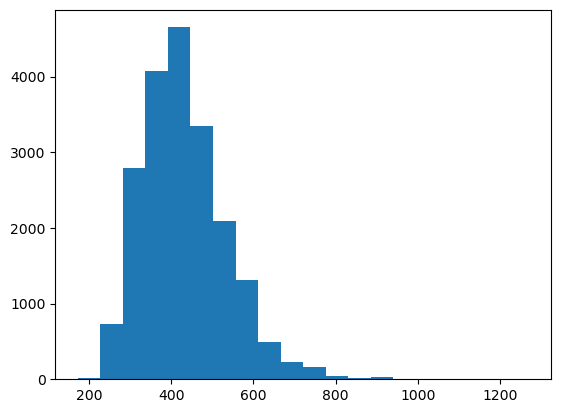

In [63]:
#Thoong ke can nang
pl.hist(data.weight_cm, bins=20)
pl.show()

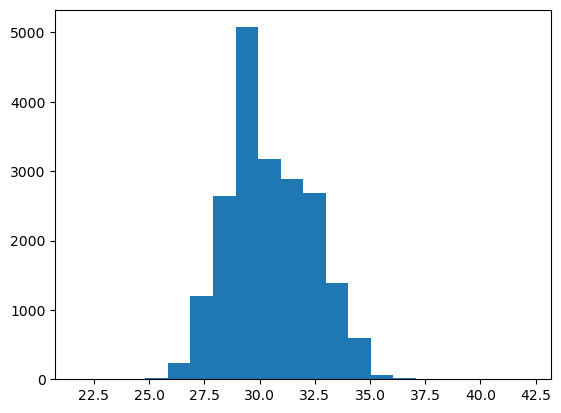

In [65]:
#Thoong ke chieu cao
pl.hist(data.height_cm, bins=20)
pl.show()

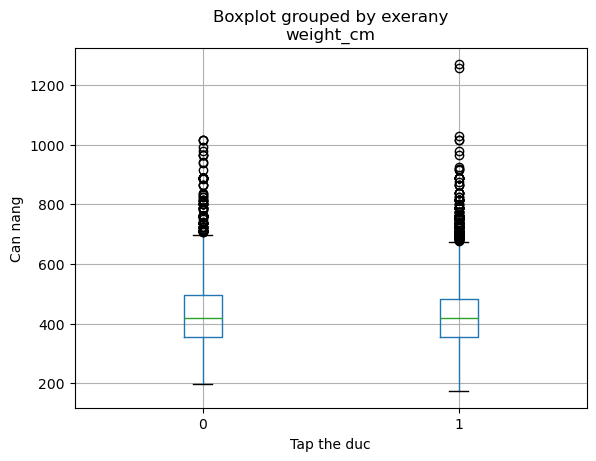

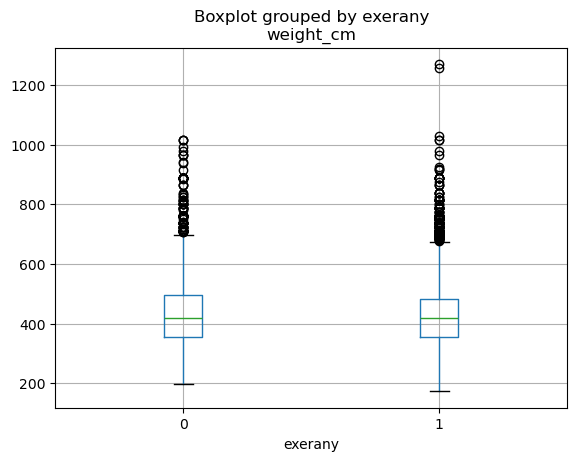

In [79]:
#b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục
data.boxplot(column='weight_cm', by='exerany')
pl.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [87]:
data.age.describe()

count    20000.000000
mean        45.068250
std         17.192689
min         18.000000
25%         31.000000
50%         43.000000
75%         57.000000
max         99.000000
Name: age, dtype: float64

### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [97]:
smoke = data.smoke100[data.smoke100 == 1].count()
print(f'Ti le phan tram nguoi hut thuoc la: {(smoke/data.smoke100.count()*100).round(2)}%')

data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70, 100], labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+'])

Ti le phan tram nguoi hut thuoc la: 47.21%


### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

---